## Taxi Trips Analysis Project
__________


In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1: Introduction

#### EDA

In [2]:
# load the dataset
main_sample = pd.read_csv('Main Sample.csv')

In [3]:
# show the first 5 rows of the dataframe
main_sample.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [4]:
# show the shape of the dataframe - (rows, columns)
main_sample.shape

(10906858, 19)

In [5]:
# show the data types of values in the columns
main_sample.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [6]:
# is there any missing values? - no
main_sample.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
# show some descriptive statistics of the numerical columns
main_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,10906858.0,1.535024,0.498772,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,10906858.0,1.670847,1.324891,0.000000,1.000000,1.000000,2.000000,9.000000e+00
trip_distance,10906858.0,4.648197,2981.095329,0.000000,1.000000,1.670000,3.080000,8.000010e+06
pickup_longitude,10906858.0,-72.818695,9.168964,-121.934288,-73.991508,-73.981377,-73.966103,0.000000e+00
pickup_latitude,10906858.0,40.114943,5.051022,0.000000,40.736301,40.753689,40.768082,6.090876e+01
RatecodeID,10906858.0,1.039350,0.518631,1.000000,1.000000,1.000000,1.000000,9.900000e+01
dropoff_longitude,10906858.0,-72.886591,8.900841,-121.933487,-73.991074,-73.979424,-73.961960,0.000000e+00
dropoff_latitude,10906858.0,40.153152,4.903456,0.000000,40.734806,40.754131,40.769619,6.090876e+01
payment_type,10906858.0,1.347536,0.491080,1.000000,1.000000,1.000000,2.000000,5.000000e+00
fare_amount,10906858.0,12.486929,35.564004,-957.600000,6.500000,9.000000,14.000000,1.112709e+05


#### Some numerical values are less than 0, which doesn't make sense. Let's find them

In [8]:
main_sample[(main_sample['tip_amount'] < 0) | (main_sample['fare_amount'] < 0) | (main_sample['extra'] < 0) | (main_sample['mta_tax'] < 0) | (main_sample['tolls_amount'] < 0) | (main_sample['improvement_surcharge'] < 0) | (main_sample['total_amount'] < 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
1774,2,2016-01-02 00:50:32,2016-01-02 00:51:16,1,0.26,-73.825645,40.712231,1,N,-73.830330,40.714161,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3
3492,2,2016-01-02 01:00:59,2016-01-02 01:01:26,1,0.05,-73.938538,40.803200,1,N,0.000000,0.000000,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
5105,2,2016-01-02 01:11:25,2016-01-02 01:14:30,1,0.53,-73.955864,40.772270,1,N,-73.951134,40.774231,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8
5611,2,2016-01-02 01:14:29,2016-01-02 01:19:01,1,0.56,-73.991737,40.722214,1,N,-73.990044,40.728008,3,-5.0,-0.5,-0.5,0.0,0.0,-0.3,-6.3
5666,2,2016-01-02 01:14:51,2016-01-02 01:16:23,2,0.04,-74.006111,40.739841,1,N,-74.005402,40.740799,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10895616,2,2016-01-29 08:57:35,2016-01-29 08:59:31,1,0.58,-73.958801,40.772465,1,N,-73.956360,40.779888,4,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3
10898624,2,2016-01-29 09:06:34,2016-01-29 09:06:53,1,0.00,-73.992401,40.715000,1,N,-73.991859,40.716042,4,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3
10905279,2,2016-01-29 09:30:29,2016-01-29 09:36:22,1,0.64,-73.995811,40.759682,1,N,-73.988907,40.766491,4,-5.5,0.0,-0.5,0.0,0.0,-0.3,-6.3
10906542,2,2016-01-22 23:02:07,2016-01-22 23:02:44,1,0.19,-73.974091,40.788898,1,N,-73.970230,40.790630,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3


#### Let's check if each of the numerical variable is within the dataset description limits

__`Improvement_surcharge:`__`0.30 improvement surcharge assessed trips at the flag drop.`

So it should be either 0.30 or 0. Other values to be considered as mistake

In [9]:
main_sample['improvement_surcharge'].value_counts()

 0.30    10901039
-0.30        4202
 0.00        1609
 0.10           5
 0.12           1
 0.16           1
 0.25           1
Name: improvement_surcharge, dtype: int64

__`MTA_tax:`__`0.50 MTA tax that is automatically triggered based on the metered rate in use.`

Should be either 0 or 0.5

In [10]:
main_sample['mta_tax'].value_counts()

 0.50     10859581
 0.00        43201
-0.50         4062
 0.35            2
 0.89            1
 2.22            1
 2.45            1
 20.50           1
 36.44           1
 10.35           1
 3.00            1
 33.49           1
 17.45           1
 89.70           1
 43.41           1
 0.93            1
Name: mta_tax, dtype: int64

_________
__`Extra:`__`Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.`

Should be either 0.5, 1 or 0

In [11]:
main_sample['extra'].value_counts()

 0.00      5710200
 0.50      3558725
 1.00      1635787
-0.50         1486
-1.00          513
 1.50           44
 0.02           25
 4.50           20
 2.00           12
 0.04           10
 0.20            6
 0.30            3
 2.50            3
 3.50            2
 0.70            2
 0.45            1
-32.69           1
-42.61           1
 0.80            1
 8.50            1
-16.65           1
 4.71            1
-0.45            1
 7.00            1
-4.50            1
 648.87          1
 4.10            1
-35.64           1
 5.00            1
 1.30            1
 0.10            1
 1.45            1
 31.80           1
-1.65            1
-0.20            1
Name: extra, dtype: int64

_______
__`Fare_amount:`__`The time-and-distance fare calculated by the meter.`

The fare can be different, but it can't be less than 0 or astronomicaly high

In [12]:
main_sample['fare_amount'].sort_values()

4269251      -957.60
4334878      -434.00
2193262      -405.00
193432       -300.00
923034       -280.00
             ...    
4751459      3039.00
3856423      4001.15
3838692      5000.00
8499603      8008.00
7461456    111270.85
Name: fare_amount, Length: 10906858, dtype: float64

__`Total_amount`__`The total amount charged to passengers`

The same situation as with `fare_amount` 

In [13]:
main_sample['total_amount'].sort_values()

4269251      -958.40
4334878      -440.34
2193262      -405.30
193432       -300.80
923034       -280.30
             ...    
4751459      3045.34
3856423      4002.05
3838692      5000.80
8499603      8008.80
7461456    111271.65
Name: total_amount, Length: 10906858, dtype: float64

__`Tolls_amount`__`Total amount of all tolls paid in trip.`

Can't be negative

In [14]:
main_sample['tolls_amount'].sort_values()

110255      -17.40
884722      -17.12
7726868     -12.50
10459645    -12.50
639043      -12.50
             ...  
598602      882.22
5966724     885.59
3630019     900.10
992315      923.58
8548190     980.15
Name: tolls_amount, Length: 10906858, dtype: float64

__`Tip_amount`__`This field is automatically populated for credit card tips.`

Can't be negative

In [15]:
main_sample['tip_amount'].sort_values()

10724554   -220.80
3614225     -70.00
7766456     -65.00
9649637     -62.00
10269801    -34.64
             ...  
8719432     550.00
5274108     800.00
180698      800.00
1617570     900.00
67897       998.14
Name: tip_amount, Length: 10906858, dtype: float64

__`Payment_type:`__`A numeric code signifying how the passenger paid for the trip.`

Should be:
1. Credit card
2. Cash
3. No charge
4. Dispute
5. Unknown
6. Voided trip



In [16]:
main_sample.payment_type.value_counts()

1    7181476
2    3673651
3      38319
4      13411
5          1
Name: payment_type, dtype: int64

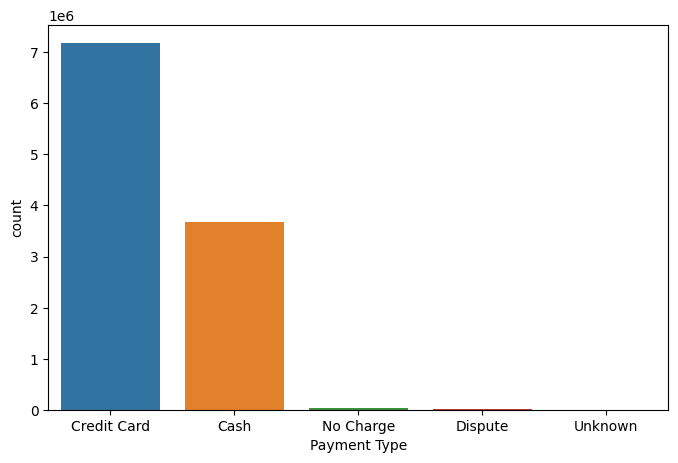

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=main_sample, x='payment_type')
plt.xticks(np.arange(5), ['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown'])
plt.xlabel('Payment Type')
plt.show()

__`Pickup_longitude`__`Longitude where the meter was engaged.`

__`Pickup_latitude`__`Latitude where the meter was engaged.`

__`Dropoff_longitude`__`Longitude where the meter was disengaged.`

__`Dropoff_ latitude`__`Latitude where the meter was disengaged.`


Seems that there are 0 values in these columns, which means actually missing values or inproper geo location

In [18]:
# showing rows with any coordinate data equals to 0
main_sample[(main_sample['dropoff_longitude'] == 0) | (main_sample['dropoff_latitude'] == 0) | (main_sample['pickup_longitude'] == 0) | (main_sample['pickup_latitude'] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
38,1,2016-01-01 00:00:19,2016-01-01 00:19:33,1,3.40,0.000000,0.000000,1,N,0.0,0.0,2,14.5,0.5,0.5,0.00,0.0,0.3,15.80
67,2,2016-01-01 00:00:41,2016-01-01 00:00:46,5,0.00,0.000000,0.000000,3,N,0.0,0.0,2,20.0,0.5,0.0,0.00,0.0,0.3,20.80
150,1,2016-01-01 00:01:34,2016-01-01 00:15:38,1,2.90,0.000000,0.000000,1,N,0.0,0.0,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30
156,2,2016-01-01 00:01:36,2016-01-01 00:20:36,1,3.55,0.000000,0.000000,1,N,0.0,0.0,1,15.5,0.5,0.5,3.36,0.0,0.3,20.16
158,2,2016-01-01 00:01:37,2016-01-01 00:25:25,2,1.53,0.000000,0.000000,1,N,0.0,0.0,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906034,1,2016-01-29 09:32:48,2016-01-29 09:47:49,1,2.50,0.000000,0.000000,1,N,0.0,0.0,2,12.0,0.0,0.5,0.00,0.0,0.3,12.80
10906370,1,2016-01-29 09:33:58,2016-01-29 09:43:28,1,1.10,0.000000,0.000000,1,N,0.0,0.0,2,7.5,0.0,0.5,0.00,0.0,0.3,8.30
10906404,1,2016-01-29 09:34:04,2016-01-29 09:44:03,1,0.60,0.000000,0.000000,1,N,0.0,0.0,1,7.5,0.0,0.5,2.07,0.0,0.3,10.37
10906760,2,2016-01-29 14:52:29,2016-01-29 14:53:29,2,0.00,-73.952721,40.584633,1,N,0.0,0.0,1,2.5,0.5,0.5,0.76,0.0,0.3,4.56


_________
__`Store_and_fwd_flag`__`Y = store and forward trip, N = not a store and forward trip`

Should be either __Y__ or __N__


In [19]:
main_sample.store_and_fwd_flag.value_counts()

N    10843625
Y       63233
Name: store_and_fwd_flag, dtype: int64

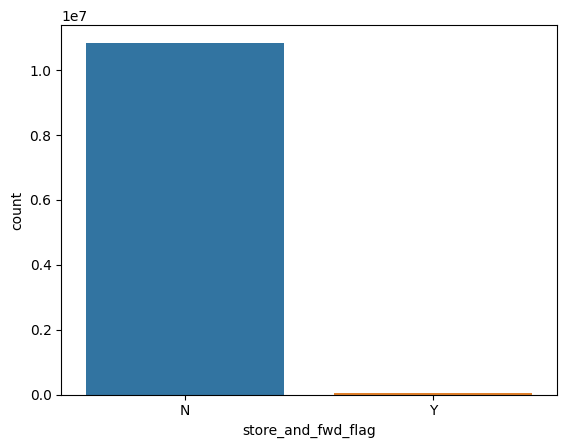

In [20]:
sns.countplot(data=main_sample, x='store_and_fwd_flag');

________
__`RateCodeID`__`The final rate code in effect at the end of the trip.`
1. Standard rate
2. JFK
3. Newark
4. Nassau or Westchester
5. Negotiated fare
6. Group ride

In [21]:
# What is 99 here?
main_sample.RatecodeID.value_counts()

1     10626315
2       225019
5        33688
3        16822
4         4696
99         216
6          102
Name: RatecodeID, dtype: int64

__`Trip_distance`__`The elapsed trip distance in miles reported by the taximeter.`

If measured correctly it shouldn't be equal to 0 or astronomicaly high 

It can also be strange comparing to starting-ending time of the trip (1 hour long trip and 200 miles)

In [22]:
main_sample.trip_distance.sort_values()

10906857          0.0
2047967           0.0
6059957           0.0
6059997           0.0
2047928           0.0
              ...    
1256517     1403240.5
2768776     1653402.0
8551614     2441418.8
2708971     4667468.7
1027151     8000010.0
Name: trip_distance, Length: 10906858, dtype: float64

In [23]:
# Checking all rows where the trip_distance is Zero
main_sample[main_sample['trip_distance']==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
67,2,2016-01-01 00:00:41,2016-01-01 00:00:46,5,0.0,0.000000,0.000000,3,N,0.000000,0.000000,2,20.0,0.5,0.0,0.00,0.00,0.3,20.80
232,1,2016-01-29 09:18:28,2016-01-29 09:18:34,1,0.0,-73.949928,40.772038,1,N,-73.949921,40.772034,3,2.5,0.0,0.5,0.00,0.00,0.3,3.30
336,2,2016-01-29 09:18:45,2016-01-29 09:18:47,1,0.0,0.000000,0.000000,2,N,0.000000,0.000000,1,52.0,0.0,0.5,8.00,0.00,0.3,60.80
425,2,2016-01-29 09:19:02,2016-01-29 09:19:06,1,0.0,-74.005180,40.706001,5,N,-74.005180,40.705986,2,65.0,0.0,0.5,0.00,0.00,0.3,65.80
448,1,2016-01-29 09:19:05,2016-01-29 09:19:05,1,0.0,-74.009949,40.703251,1,N,0.000000,0.000000,2,3.5,0.0,0.5,0.00,0.00,0.3,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10906760,2,2016-01-29 14:52:29,2016-01-29 14:53:29,2,0.0,-73.952721,40.584633,1,N,0.000000,0.000000,1,2.5,0.5,0.5,0.76,0.00,0.3,4.56
10906764,2,2016-01-29 15:55:10,2016-01-29 15:55:45,5,0.0,0.000000,0.000000,1,N,0.000000,0.000000,1,2.5,0.5,0.5,0.76,0.00,0.3,4.56
10906779,2,2016-01-29 22:48:38,2016-01-29 22:48:47,1,0.0,-73.987198,40.718418,1,N,-73.987350,40.718460,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80
10906854,1,2016-01-05 00:15:55,2016-01-05 00:16:06,1,0.0,-73.945488,40.751530,1,N,-73.945457,40.751530,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80


In [24]:
# Checking for rows with distance more than 1000
main_sample[main_sample['trip_distance'] > 1000]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
1027151,1,2016-01-04 14:56:45,2016-01-04 15:27:47,1,8000010.0,-73.998978,40.734444,1,N,-73.939156,40.843288,2,27.5,0.0,0.5,0.00,0.0,0.3,28.30
1046137,1,2016-01-04 17:12:01,2016-01-04 17:27:36,1,633008.3,-73.991150,40.739609,1,N,-73.992462,40.713997,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30
1256517,1,2016-01-05 22:51:22,2016-01-05 22:51:35,1,1403240.5,-73.945007,40.751808,1,N,-73.944992,40.751827,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80
1256744,1,2016-01-05 22:53:29,2016-01-05 22:53:49,1,281060.3,-73.945023,40.751831,1,N,-73.945053,40.751842,3,2.5,0.0,0.5,0.00,0.0,0.3,3.30
2708971,1,2016-01-28 10:41:15,2016-01-28 11:03:53,1,4667468.7,-74.007156,40.734352,1,N,-74.007782,40.712494,1,14.5,0.0,0.5,3.06,0.0,0.3,18.36
2768776,1,2016-01-28 11:39:07,2016-01-28 11:41:29,2,1653402.0,-73.945663,40.751747,1,N,-73.945610,40.751617,2,2.5,0.0,0.5,0.00,0.0,0.3,3.30
8551614,1,2016-01-21 14:18:40,2016-01-21 14:27:53,4,2441418.8,-73.952095,40.824539,1,N,-73.948524,40.827324,2,2.5,0.0,0.5,0.00,0.0,0.3,3.30


__`Passenger_count`__`The number of passengers in the vehicle. This is a driver-entered value.`

0 passengers considered as mistake

In [25]:
main_sample['passenger_count'].value_counts()

1    7726984
2    1561977
5     601079
3     436431
6     369155
4     210641
0        520
8         26
9         23
7         22
Name: passenger_count, dtype: int64

__`VendorID`__`A code indicating the TPEP provider that provided the record.
1. Creative Mobile Technologies
2. VeriFone Inc.

In [26]:
main_sample['VendorID'].value_counts()

2    5835429
1    5071429
Name: VendorID, dtype: int64

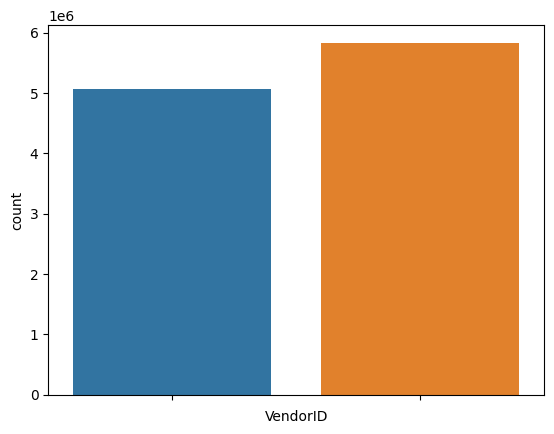

In [27]:
sns.countplot(data=main_sample, x='VendorID');
plt.xticks([0,1], [])
plt.show()

## 2: Data Analysis

### Data Preprocessing

It looks that there are some incorrect values in the dataset, so it needs to be cleaned and preprocessed for further analysis.

There are several ways to deal with incorrect or missing values. One way, for example, is to impute or replace bad values by the most closely to truth.
However, in this case I decided to drop trips where we have totally wrong numberic values, because one improper value led to the final `total_amount` mistake and also because among more that 10 mio trips we have just few rows with wrong data, so deleting them won't change the overall picture, but will definetely increase the accuracy of our analysis. Since each variable have values that is not according to the dataset description, I decided to shape the dataset as a real life taxi trip by creating some limitation to the trips which is shown in the list below.

Steps to perform:
1. Change all money-related negative values to non-negative by taking their absolute values
2. Create `time_duration` column by subtracting dropoff time from pickup time
3. Remove trips with a `time_duration` less than 3 min
4. Remove trips where `fare_amount` is less than 3.5
5. Remove trips where coordinates are outside the range coordinates for New York City 
`(-71.7517 - 79.7624) (40.4772 - 45.0153)`
6. Remove trips where `trip_distance` is less than 1
7. Remove trips where `improvement_surcharge` is not equal to 0.3 or 0
8. Remove trips where `mta_tax` is not equal to 0 or .5
9. Remove trips where `extra` is not equal to .5, 1 or 0
10. Remove extremely high `Fare_amount` and `total_amount`
11. Replace '99' in `RateCodeID` with the most frequently observed `1`
12. Remove rows with extremely high values of `Tip_amount`, `Tolls_amount`, `fare_amount` and `Total_amount`
13. Convert date columns to datetime format

#### Negative to non-negative

In [28]:
data = main_sample.copy()
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [29]:
data.shape

(10906858, 19)

In [30]:
# take columns with money-related numerical values
data.columns[-7:] 

Index(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [31]:
# show how much negative values we have there
(data.loc[:, data.columns[-7:]] < 0).sum()

fare_amount              4216
extra                    2007
mta_tax                  4062
tip_amount                128
tolls_amount               24
improvement_surcharge    4202
total_amount             4217
dtype: int64

In [32]:
# take the absolute value of all our money-related values
data.loc[:, data.columns[-7:]] = data.loc[:, data.columns[-7:]].abs()

In [33]:
# now we don't have negatives
(data.loc[:, data.columns[-7:]] < 0).sum()

fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

#### Creating `time_duration`, and select rows with at least 3 minutes

In [34]:
data['trip_duration'] = round((pd.to_datetime(data['tpep_dropoff_datetime']) - pd.to_datetime(data['tpep_pickup_datetime'])).dt.total_seconds() / 60, 2)

In [35]:
data = data[(data['trip_duration'] >= 3)]

#### `fare_amount` 

In [36]:
# we base the fare_amount to be at least 3 dollars
data = data[(data['fare_amount'] >= 3)]

#### Selecting rows that are within the range of NYC coordinates

In [37]:
# we select pickup_longitude between -71.7517 and -79.7624 and pickup_latitude between 40.4772 and 45.0153
data = data[(data['pickup_longitude'] >= -79.7624) & (data['pickup_longitude'] <= -71.7517) & (data['pickup_latitude'] >= 40.4772) & (data['pickup_latitude'] <= 45.0153)]

#### Selecting data with `payment_type 1 and 2` 

In [38]:
data = data[(data['payment_type'] == 1) | (data['payment_type'] == 2)]

#### Remove trips where `trip_distance` is less than 1

In [39]:
# drop all the rows where "trip_distance" is < 1
data = data[(data['trip_distance'] >= 1)]

#### Remove trips with wrong `extra`, `mta_tax` and `improvement_surcharge` data

In [40]:
# there are only 92 rows with incorrect money values, so delete them
data[(~data['improvement_surcharge'].isin([.3, 0])) |
     (~data['mta_tax'].isin([.5, 0])) |
     (~data['extra'].isin([.5, 1, 0]))].shape[0]

92

In [41]:
# drop the rows with bad values
data.drop(data[(~data['improvement_surcharge'].isin([.3, 0])) |
               (~data['mta_tax'].isin([.5, 0])) |
               (~data['extra'].isin([.5, 1, 0]))].index, inplace=True)

In [42]:
data.shape

(8087058, 20)

#### Replace '99' in `RateCodeID` to '1'

In [43]:
# number of rows where 'RatecodeID' is 99 before 
data[data['RatecodeID'] == 99].shape[0]

57

In [44]:
# replacing '99' with '1', keeping other untouched 
data['RatecodeID'] = np.where(data['RatecodeID'] == 99, 1, data['RatecodeID'])

In [45]:
# number of rows where 'RatecodeID' is 99 after
data[data['RatecodeID'] == 99].shape[0]

0

#### Dealing with `Tip_amount`, `Tolls_amount`, `fare_amount` and `Total_amount`

We have some outlier values in these columns. However, we don't know if all of them wrong or not.

I would propose to keep all of the high values, except top 2 of `total_amount` and `fare_amount`, for __Talk A__.

For __Task B__ we'll probably remove the outliers in order to increase the model accuracy.

In [46]:
# removing all the rows where tip_amount is < 0
data = data[(data['tip_amount'] >= 0)]

In [47]:
data[['tip_amount', 'tolls_amount', 'fare_amount', 'total_amount']].describe(percentiles=[.5, .75, .9999]).T

,count,mean,std,min,50%,75%,99.99%,max
tip_amount,8087058.0,2.051603,2.666144,0.0,1.66,2.75,41.662943,998.14
tolls_amount,8087058.0,0.379909,1.692777,0.0,0.00,0.00,22.171772,923.58
fare_amount,8087058.0,14.614514,10.985404,3.0,11.00,16.50,165.000000,926.00
total_amount,8087058.0,18.162508,13.705918,3.3,13.56,19.80,197.729430,1212.04


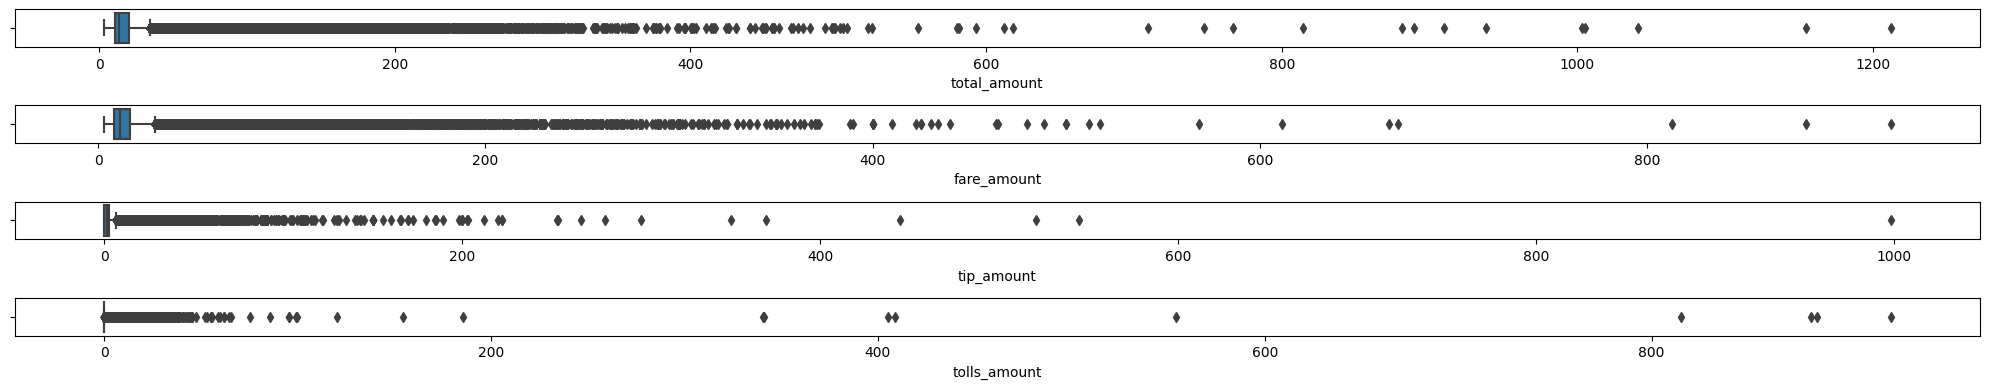

In [48]:
fig, axs = plt.subplots(4, 1, figsize=(20, 4))
sns.boxplot(data=data, x='total_amount', ax=axs[0])
sns.boxplot(data=data, x='fare_amount', ax=axs[1])
sns.boxplot(data=data, x='tip_amount', ax=axs[2])
sns.boxplot(data=data, x='tolls_amount', ax=axs[3])
plt.tight_layout()
plt.show()

In [49]:
data.shape

(8087058, 20)

#### Convert date columns to datetime format

In [50]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [51]:
data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
trip_duration                   float64
dtype: object

### Task A

For this task we'll need to work with datetime and total amount data from the preprocessed dataset, called data_a.

A target datetime column will be `tpep_pickup_datetime`. I will calculate daily and hourly trends based on the time of the taxi trip start.

Also, I will create temporary additional columns to answer the questions.

In [52]:
# take only 2 needed columns from the cleaned dataset
data_a = data[['tpep_pickup_datetime', 'total_amount']].copy()

In [53]:
# create additional columns for Task A.ii and Task A.iii
# morning: 06:00 - 11:59
# afternoon: 12:00-17:59
# evening: 18:00-23:59
# night: 00:00-05:59
data_a['day_time'] = 'NA'
data_a['day_time'] = np.where(data_a['tpep_pickup_datetime'].dt.hour.isin(np.arange(6, 12, 1)), 'morning', data_a['day_time'])
data_a['day_time'] = np.where(data_a['tpep_pickup_datetime'].dt.hour.isin(np.arange(12, 18, 1)), 'afternoon', data_a['day_time'])
data_a['day_time'] = np.where(data_a['tpep_pickup_datetime'].dt.hour.isin(np.arange(18, 24, 1)), 'evening', data_a['day_time'])
data_a['day_time'] = np.where(data_a['tpep_pickup_datetime'].dt.hour.isin(np.arange(0, 6, 1)), 'night', data_a['day_time'])

# day names
data_a['day_name'] = data_a['tpep_pickup_datetime'].dt.day_name()

data_a

,tpep_pickup_datetime,total_amount,day_time,day_name
5,2016-01-01 00:00:00,20.30,night,Friday
6,2016-01-01 00:00:00,27.30,night,Friday
7,2016-01-01 00:00:01,10.30,night,Friday
8,2016-01-01 00:00:02,19.30,night,Friday
9,2016-01-01 00:00:02,12.80,night,Friday
...,...,...,...,...
10906851,2016-01-31 22:53:00,9.30,evening,Sunday
10906852,2016-01-31 23:00:11,13.30,evening,Sunday
10906853,2016-01-31 23:30:32,9.80,evening,Sunday
10906855,2016-01-05 06:12:46,8.80,morning,Tuesday


#### Task A.i

What is the average demand for the taxis in the days of the week (i.e., daily trend). Which of the days has the highest and which lowest demand?

In [54]:
daily_demand = data_a[['tpep_pickup_datetime']].groupby(data_a['tpep_pickup_datetime'].dt.weekday).count().rename(columns={'tpep_pickup_datetime':'avg_demand'})
daily_demand.index.rename('weekday', inplace=True)
daily_demand['avg_demand'] = daily_demand['avg_demand']/data.shape[0]
daily_demand

,avg_demand
weekday,
0,0.115688
1,0.127905
2,0.134036
3,0.140346
4,0.180809
5,0.153640
6,0.147575


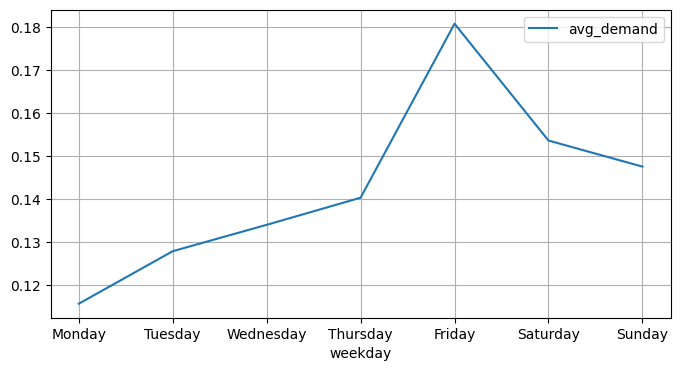

In [55]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=daily_demand)
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid()
plt.show()

Top demand day is Friday and lowest demand day is Monday

#### Task A.ii

Which time of the day (morning, afternoon, evening, and night) is likely be a peak period for the taxi’s operation from the data?

In [56]:
hourly_demand = data_a.groupby(data_a['day_time']).tpep_pickup_datetime.count().to_frame()
hourly_demand = hourly_demand.rename(columns={'tpep_pickup_datetime':'demand'})
hourly_demand

,demand
day_time,
afternoon,2358825
evening,2804546
morning,1867904
night,1055783


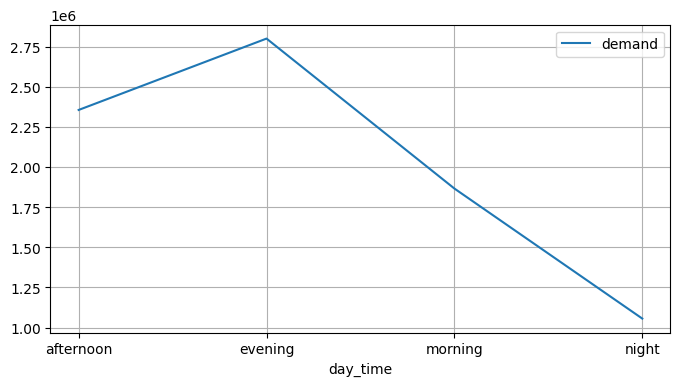

In [57]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=hourly_demand)
plt.grid()
plt.show()

Evening is the peak part of the day in terms of taxi demand 

#### Task A.iii

On average, how much revenue was generated in the weekdays and weekends for the business for the period covered in the dataset?

In [58]:
data_a['working_weekend'] = np.where(data_a.tpep_pickup_datetime.dt.weekday.isin(np.arange(5)), 'weekday', 'weekend')

In [59]:
data_a.working_weekend.value_counts()

weekday    5651111
weekend    2435947
Name: working_weekend, dtype: int64

In [60]:
data_a.groupby('working_weekend').mean().rename(columns={'total_amount':'average_revenue'})

,average_revenue
working_weekend,
weekday,18.543618
weekend,17.278377


In [61]:
data_a.groupby('day_name').mean().rename(columns={'total_amount':'average_revenue'})

,average_revenue
day_name,
Friday,18.196327
Monday,18.870004
Saturday,16.903955
Sunday,17.668185
Thursday,18.621527
Tuesday,18.770447
Wednesday,18.432362


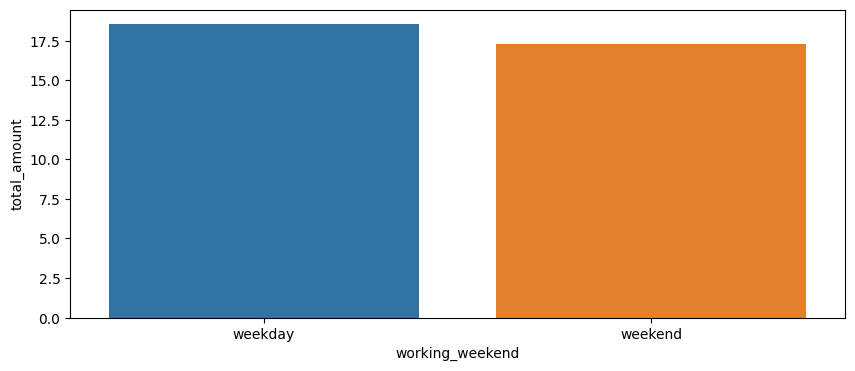

In [62]:
# plot the average revenue for two groups of days - weekdays and weekends
plt.figure(figsize=(10, 4))
sns.barplot(data=data_a, x='working_weekend', y='total_amount', ci=None);

In [63]:
data_a.groupby('day_name').mean()

,total_amount
day_name,
Friday,18.196327
Monday,18.870004
Saturday,16.903955
Sunday,17.668185
Thursday,18.621527
Tuesday,18.770447
Wednesday,18.432362


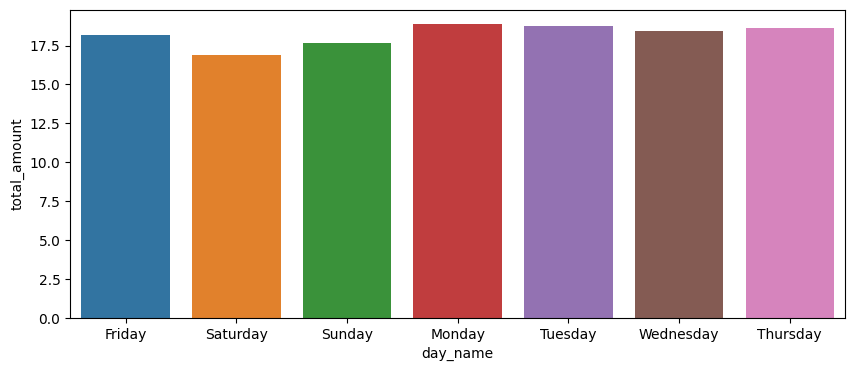

In [64]:
# plot the average revenue for day name 
plt.figure(figsize=(10, 4))
sns.barplot(data=data_a, x='day_name', y='total_amount', ci=None);

## 3: Regression Analysis

### Task B

First of all, in order to have max accurate prediction model I will remove all outliers from the data. Those values are not necessarily the mistakes. That's why I didn't remove them before analyzing weekly/daily patterns. But those outliers can badly influence on the prediction model performance, so I remove them now.

1. `passenger_count` - Number of passengers. 7,8,9 are rare enough to not count them. 0 passengers is meaningless.

In [65]:
data.passenger_count.value_counts()

1    5684947
2    1183285
5     452395
3     329758
6     276532
4     160073
0         43
8          9
7          8
9          8
Name: passenger_count, dtype: int64

In [66]:
# keep only the trips with 1 t o 6 passengers
data = data[data['passenger_count'].isin([1, 2, 3, 4, 5, 6])]

2. `Fare_amount` - seems to be the most influencial and the highest contributor to the target `total_amount` variable. There are some very large unreal values. So, I will keep only those that are inside the 99.95% percentile.

In [67]:
# keep only first 99.95% of fare_amounts
data= data[data['fare_amount'] <= data['fare_amount'].quantile(0.9995)]

3. `trip_distance` - Unfortunately, some of the records are incorrect. I'll keep the first 99.95% of these values as well.

In [68]:
# keep only the records with trip distance less than the 99.95% percentile
data = data[data['trip_distance'] <= data['trip_distance'].quantile(0.9995)]

4. `tip_amount` - Although the tips can be huge, they're rarely greater than certain amount. I'll keep the first 99.95% of these values as well.

In [69]:
# keep only the records with tip amount less than the 99.95% percentile
data = data[data['tip_amount'] <= data['tip_amount'].quantile(0.9995)]

5. `tolls_amount` - The same approach here - I'll keep the first 99.95% of these values.

In [70]:
# keep only the records with tolls amount less than the 99.95% percentile
data = data[data['tolls_amount'] <= data['tolls_amount'].quantile(0.9995)]

6. `payment_type` - seems that only payments made by credit card and in cash are meaningfull, so I'll keep only types 1 and 2.

In [71]:
# keep only the records with payment type 1 and 2
data = data[data['payment_type'].isin([1,2])]

In [72]:
# now the numerical values are close to reality
data.describe(percentiles=[.25, .5, .75, .9995]).T

,count,mean,std,min,25%,50%,75%,99.95%,max
VendorID,8071018.0,1.540996,0.498317,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
passenger_count,8071018.0,1.682123,1.331562,1.000000,1.000000,1.000000,2.000000,6.000000,6.000000
trip_distance,8071018.0,3.574696,3.735555,1.000000,1.460000,2.170000,3.810000,24.200000,27.390000
pickup_longitude,8071018.0,-73.971591,0.042313,-79.025742,-73.991898,-73.981728,-73.966904,-73.776649,-71.918953
pickup_latitude,8071018.0,40.749787,0.029504,40.478008,40.735809,40.753395,40.768181,40.850746,43.928783
RatecodeID,8071018.0,1.032752,0.216895,1.000000,1.000000,1.000000,1.000000,5.000000,6.000000
dropoff_longitude,8071018.0,-73.948793,1.308002,-99.748337,-73.991272,-73.979271,-73.961342,-73.662053,0.000000
dropoff_latitude,8071018.0,40.738295,0.721075,0.000000,40.733841,40.753990,40.770172,40.898970,60.908756
payment_type,8071018.0,1.315064,0.464541,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000
fare_amount,8071018.0,14.478693,10.344569,3.000000,8.000000,11.000000,16.500000,74.000000,101.000000


__Regression models__ work with numerical variables, but we have a timestamp columns in the dataset - `tpep_pickup_datetime` and `tpep_dropoff_datetime`. I can't just remove them, because I lose important information then. So I extract `day`, `weekday` and `hour` from the pick-up datetime column to keep it for the regression model.

I will also convert `Y` and `N` values in the column `store_and_fwd_flag` to `1` and `0` respectively.

In [73]:
# convert 'Y' and 'N' to '1' and '0'
data.store_and_fwd_flag = np.where(data.store_and_fwd_flag == 'Y', 1, 0)

In [74]:
# create additional columns by extracting weekday, day and hour from 'tpep_pickup_datetime' column
data['weekday'] = data['tpep_pickup_datetime'].dt.weekday
data['day'] = data['tpep_pickup_datetime'].dt.day
data['hour'] = data['tpep_pickup_datetime'].dt.hour

In [75]:
# remove timestamp columns
data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

In [76]:
data.drop(['trip_duration'], axis=1, inplace=True)

In [77]:
# so, we have only numerical values here
data.dtypes

VendorID                   int64
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag         int32
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
weekday                    int64
day                        int64
hour                       int64
dtype: object

Before creating a __regression model__, let's see which __variables__ have the strongest and weakest __correlation__ with `fare_amount` and also which variables correlate with each other

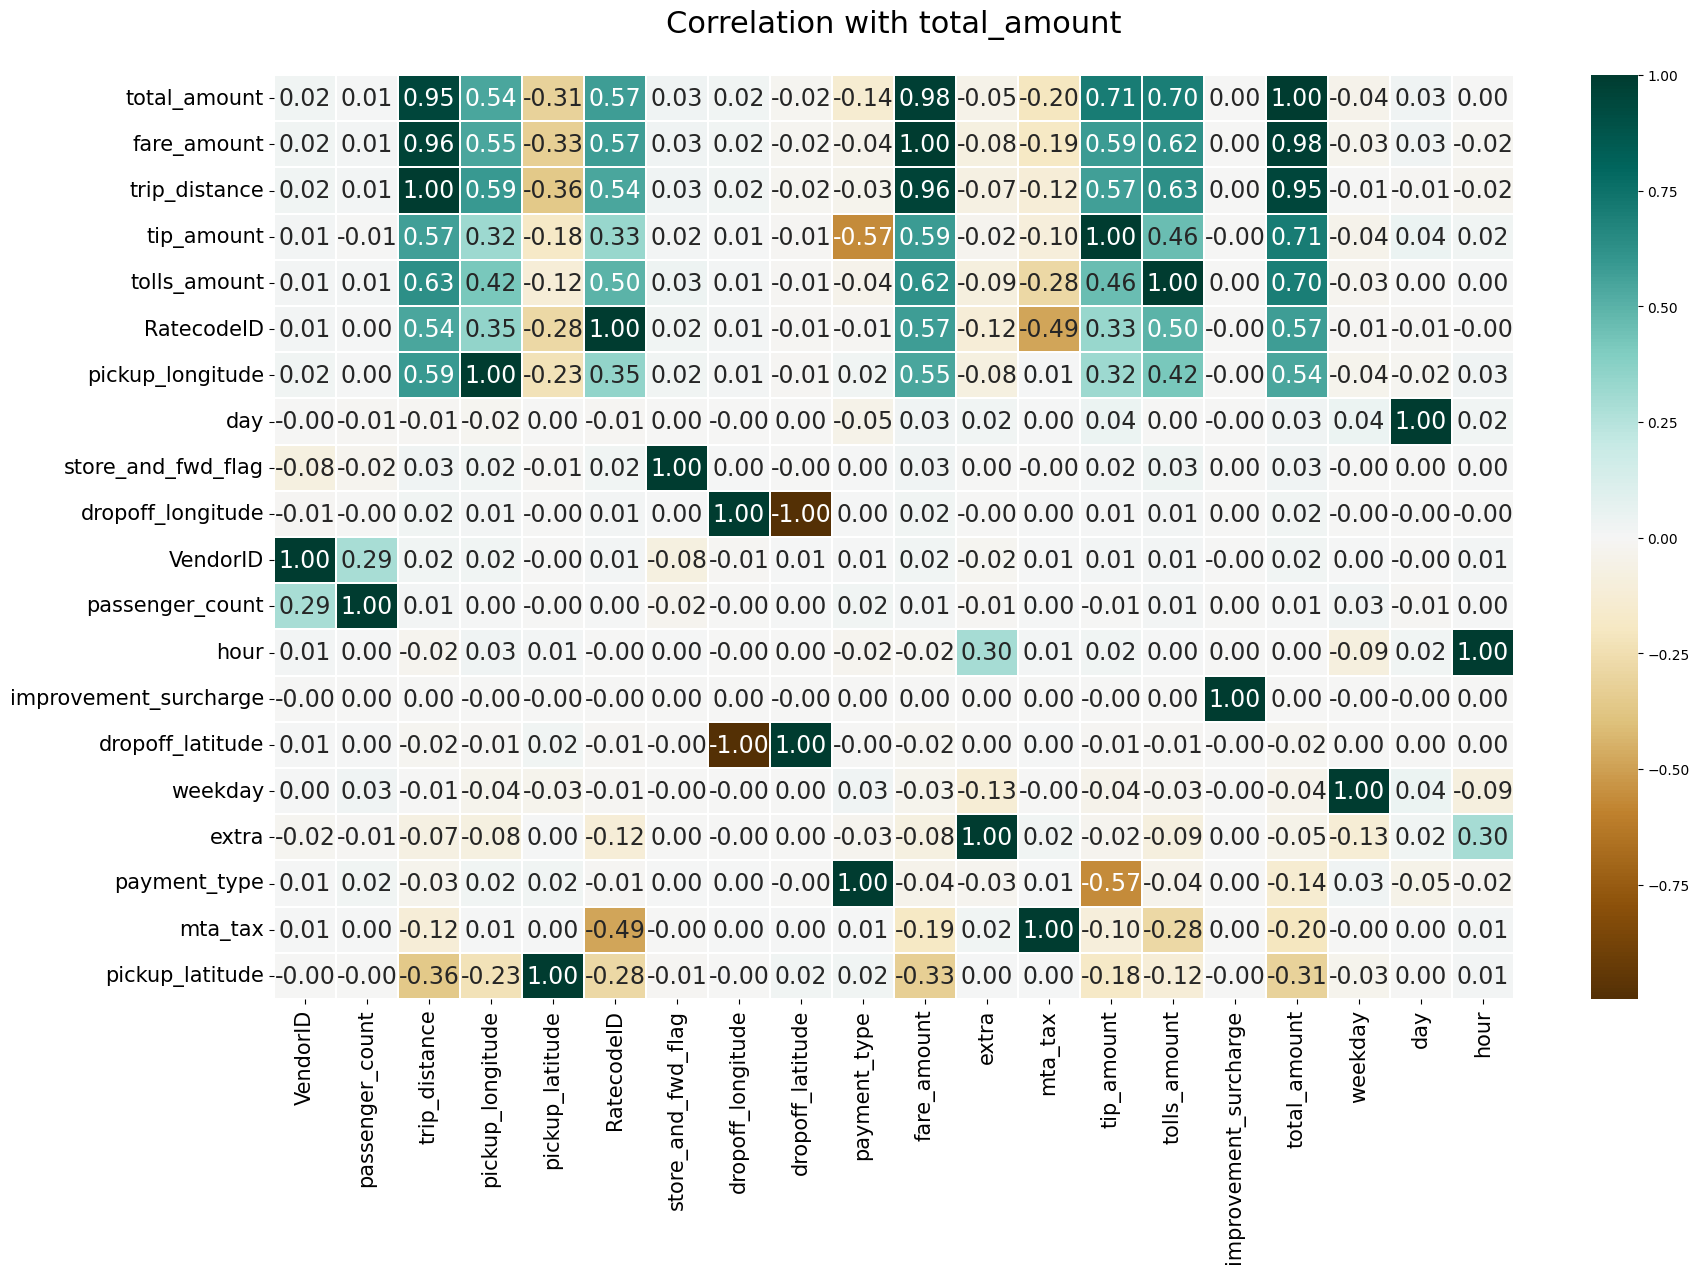

In [78]:
# correlation between variables
corr = data.corr().sort_values(by='total_amount', ascending=False)

# plot it
fig, ax = plt.subplots(figsize = (20,12))
sns.heatmap(corr, annot = True, cmap ='BrBG', ax = ax, fmt='.2f', linewidths = 0.05, annot_kws = {'size': 17})
ax.tick_params(labelsize = 15)
ax.set_title('Correlation with total_amount\n', fontsize = 22)
plt.show()

We see strong positive correlations between `total_amount` and `trip_distance`, `fare_amount`, `tip_amount` and `tolls_amount`. And it looks logical.

Therefore, I will use a __linear regression model__ trying to find the most __features__ that explain our __target__ variable and also their __contribution__ to its value.

In [79]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # metrics

Our target variable `y` is a `total_amount` column and our features `X` are the numerical preprocessed variables `['trip_distance', 'fare_amount', 'tolls_amount']`.

In [80]:
# we are selecting three features to train the model
X = data[['trip_distance', 'fare_amount', 'tolls_amount']]
y = data['total_amount']

In [81]:
data.shape

(8071018, 20)

Now, let's split sequentially our dataset to `train` and `test` sets for further training and testing the regression model

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=42)

Train the __Linear Regression__ model with default properties

In [83]:
lin_reg = LinearRegression()

# training the model
lin_reg.fit(X_train, y_train)

LinearRegression()

Now use the trained model to predict `total_amount` based on the features from the `test` part of our dataset. 

In [84]:
# Make prediction
y_pred = lin_reg.predict(X_test)

### Model Evaluation - checking the model accuracy

Now we have 20% of our dataset with initial values of `total_amount` - __y_test__ and predicted - __y_pred__.

We'll compare them using statistical metrics.

So, in order to assess the accuracy of the model, I'll use the following metrics:
- MSE - mean_squared_error 
- RMSE - Root-mean-square deviation
- R2 - coefficient of determination
- MAE - mean_absolute_error

In [85]:
# for RMSE we need a small function
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [86]:
# calculating and printing the metrics
print('The lowest the better:\n')
print(f'MSAE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print()
print('The closest to 1 the better:\n')
print(f'R2 score: {r2_score(y_test, y_pred)}')

The lowest the better:

MSAE: 3.9784595882360074
RMSE: 1.994607627639082
MAE: 1.4787911826800457

The closest to 1 the better:

R2 score: 0.975971038936782


### Find regression coefficients and make an equation

In [87]:
#display intercept, regression coefficients and R-squared value of model
print(f'Intercept: {lin_reg.intercept_}', f'Coefficients: {lin_reg.coef_}', f'Score: {lin_reg.score(X, y)}', sep='\n\n')

Intercept: 1.4575642898162897

Coefficients: [0.03139742 1.10251777 1.2405012 ]

Score: 0.9759900356110655


In [88]:
print(f'We can see that the R2 value of the model is {lin_reg.score(X, y)}')

We can see that the R2 value of the model is 0.9759900356110655


This means that 97.59% of the variation of the `total_amount` variable can be explained by our variables in the model.

Now, I show the `features` and their `coefficients` to make a final `equation`

In [89]:
coefs = ['{:f}'.format(item) for item in lin_reg.coef_]

In [90]:
pd.DataFrame(data=coefs, index=X_train.columns)

,0
trip_distance,0.031397
fare_amount,1.102518
tolls_amount,1.240501


#### Regression Equation

In [91]:
print('Model equation:', 'total_amount =', round(lin_reg.intercept_, 2), '+',
      ' + '.join([f'{round(coef, 2)} * {col}' for col, coef in zip(X.columns, lin_reg.coef_)]))

Model equation: total_amount = 1.46 + 0.03 * trip_distance + 1.1 * fare_amount + 1.24 * tolls_amount


In [92]:
lin_reg.intercept_

1.4575642898162897

It looks like the `accuracy` of our `trained model` is good enough, so we use it to `predict` the `total amount` paid on a trip for the trip records shown in `New Sample` file

In [93]:
# loading new_sample dataset
new_sample = pd.read_csv('New Sample.csv')
new_sample.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,2,2/25/2016 17:24,2/25/2016 17:27,2,0.70,-73.947250,40.763771,1,N,-73.992012,40.735390,2,5.0,0.0,0.5,0.0,0.0,0.3
1,2,2/25/2016 23:10,2/25/2016 23:31,2,5.52,-73.983017,40.750992,1,N,-73.988586,40.758839,2,20.0,0.5,0.5,0.0,0.0,0.3
2,2,2/1/2016 0:00,2/1/2016 0:10,6,1.99,-73.992340,40.758202,1,N,-73.964355,40.757977,1,9.5,0.5,0.5,0.7,0.0,0.3
3,1,2/1/2016 0:00,2/1/2016 0:05,1,1.50,-73.981453,40.749722,1,N,-73.982323,40.763985,2,6.5,0.5,0.5,0.0,0.0,0.3
4,2,2/1/2016 0:00,2/1/2016 0:20,1,5.60,-74.000603,40.729755,1,N,-73.951324,40.669834,1,20.0,0.5,0.5,4.0,0.0,0.3


We need to `preprocess` the `New Sample` data first in the same way as we did it with the `trained dataset`

In [94]:
new_sample.tpep_pickup_datetime = pd.to_datetime(new_sample.tpep_pickup_datetime)
new_sample.store_and_fwd_flag = np.where(new_sample.store_and_fwd_flag == 'Y', 1, 0)
new_sample['weekday'] = new_sample['tpep_pickup_datetime'].dt.weekday
new_sample['day'] = new_sample['tpep_pickup_datetime'].dt.day
new_sample['hour'] = new_sample['tpep_pickup_datetime'].dt.hour
new_sample.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)
new_sample.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,weekday,day,hour
0,2,2,0.70,-73.947250,40.763771,1,0,-73.992012,40.735390,2,5.0,0.0,0.5,0.0,0.0,0.3,3,25,17
1,2,2,5.52,-73.983017,40.750992,1,0,-73.988586,40.758839,2,20.0,0.5,0.5,0.0,0.0,0.3,3,25,23
2,2,6,1.99,-73.992340,40.758202,1,0,-73.964355,40.757977,1,9.5,0.5,0.5,0.7,0.0,0.3,0,1,0
3,1,1,1.50,-73.981453,40.749722,1,0,-73.982323,40.763985,2,6.5,0.5,0.5,0.0,0.0,0.3,0,1,0
4,2,1,5.60,-74.000603,40.729755,1,0,-73.951324,40.669834,1,20.0,0.5,0.5,4.0,0.0,0.3,0,1,0


In [95]:
new_sample = new_sample[['trip_distance', 'fare_amount', 'tolls_amount']]

Now run the `trained model` on the values to predict the `total_amount`

In [96]:
new_sample_total_amount = lin_reg.predict(new_sample)

In [97]:
predictions = pd.DataFrame(new_sample_total_amount, columns=['predicted_total_amount'])

Tabulating the predicted values in the order the records are arranged in the file

In [98]:
predictions

,predicted_total_amount
0,6.992131
1,23.681233
2,11.993964
3,8.671026
4,23.683745
5,19.245102
6,8.669456
7,8.658467
8,9.787986
9,19.239137
